#  Decision Tree Regression

In [26]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib


#  Load the Dataset

In [27]:
# Load Dataset
df = pd.read_csv('StudentsPerformance.csv')

# Create target and features
X = df.drop(columns=['math score'])
y = df['math score']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()


#  Data Preprocessing

In [4]:
# Preprocessing pipelines
categorical_transformer = OneHotEncoder(drop='first', sparse_output=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ])


#  Build and Train Decision Tree Regressor

In [5]:
# Create the base model pipeline
base_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  Hyperparameter Tuning

In [6]:
# Hyperparameter tuning
param_grid = {
    'regressor__max_depth': [5, 10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None]
}

search = RandomizedSearchCV(base_model, param_distributions=param_grid, cv=5, n_iter=20, n_jobs=-1, random_state=42)
search.fit(X_train, y_train)

# Best model
model = search.best_estimator_
print("Best Parameters:", search.best_params_)


Best Parameters: {'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 4, 'regressor__max_features': None, 'regressor__max_depth': 30}


#  Model Evaluation

In [7]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R^2 Score: 0.8028534288910492
MAE: 5.371619047619046
MSE: 47.97333117913831


#  Residual Analysis

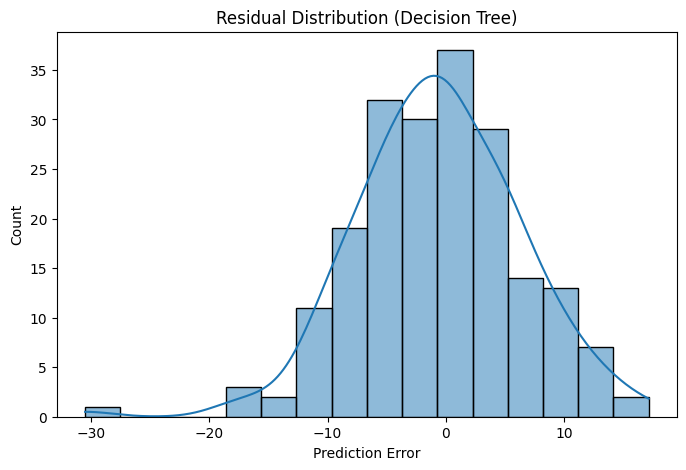

In [8]:
# Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution (Decision Tree)')
plt.xlabel('Prediction Error')
plt.show()


#  Actual vs Predicted Plot

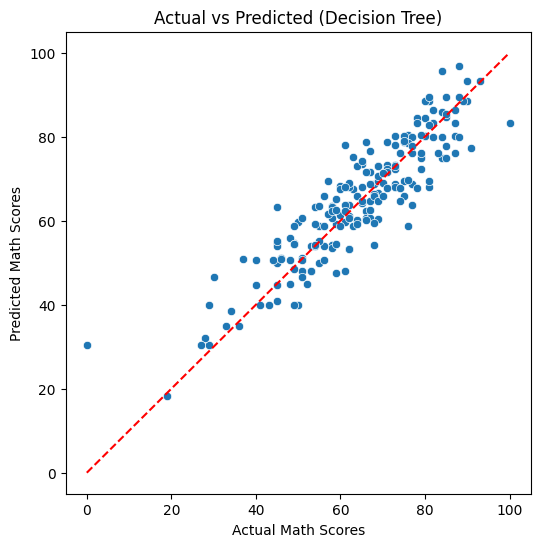

In [9]:
# Actual vs Predicted Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Math Scores')
plt.title('Actual vs Predicted (Decision Tree)')
plt.show()


#  Cross-Validation

In [10]:
# Cross-validation
scores = cross_val_score(model, X, y, scoring='r2', cv=10)
print("Cross-Validated R^2:", np.mean(scores))


Cross-Validated R^2: 0.788551704193067


#  Export the Trained Model

In [11]:
# Export model
joblib.dump(model, 'models/decision_tree_model.pkl')


['models/decision_tree_model.pkl']

#  Feature Importances

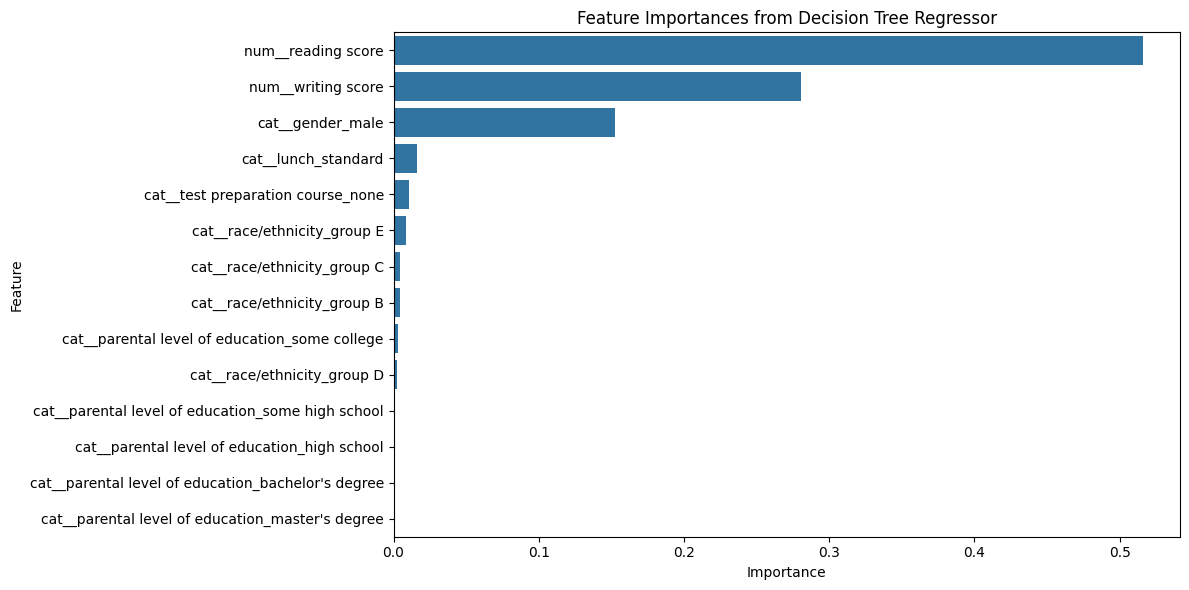

In [12]:
# Feature Importances
regressor = model.named_steps['regressor']
feature_names = model.named_steps['preprocessor'].get_feature_names_out()
importances = regressor.feature_importances_

plt.figure(figsize=(12,6))
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Decision Tree Regressor')
plt.tight_layout()
plt.show()
